In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_file = r"E:\Machine Learning\Hackathon\Hackathon\Hackathon\CreditScore\CreditScore_train.csv"
test_file = r"E:\Machine Learning\Hackathon\Hackathon\Hackathon\CreditScore\CreditScore_test.csv"

In [3]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [4]:
train_data.shape

(80000, 305)

In [5]:
test_data.shape

(20000, 305)

In [6]:
train_data['Source'] = 'Train'
test_data['Source'] = 'Test'

In [7]:
final_data = pd.concat([train_data,test_data])

In [8]:
final_data.shape

(100000, 306)

In [9]:
final_data.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,Source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,807,Train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0.8417,1,1,1,0,NaN,0,NaN,819,Train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,NaN,0,0,0,0,NaN,0,NaN,803,Train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,530,Train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,1,1,1,0,NaN,0,NaN,485,Train


In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Columns: 306 entries, x001 to Source
dtypes: float64(41), int64(264), object(1)
memory usage: 234.2+ MB


In [11]:
final_data.duplicated().sum()

0

In [12]:
final_data.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
x006          0
x007          0
x008          0
x009          0
x010          0
x011          0
x012          0
x013          0
x014          0
x015          0
x016          0
x017          0
x018          0
x019          0
x020          0
x021          0
x022          0
x023          0
x024          0
x025          0
x026          0
x027          0
x028          0
x029          0
x030          0
          ...  
x277          0
x278          0
x279          0
x280          0
x281          0
x282          0
x283          0
x284          0
x285          0
x286          0
x287      24821
x288      49756
x289      49756
x290      49756
x291          0
x292          0
x293      51133
x294          0
x295      86533
x296          0
x297      58112
x298          0
x299          0
x300          0
x301          0
x302      73069
x303          0
x304      81875
y             0
Source        0
Length: 306, dtype: int6

In [13]:
final_data.columns[final_data.isna().sum() > 20000]

Index(['x002', 'x003', 'x004', 'x041', 'x057', 'x058', 'x098', 'x148', 'x155',
       'x162', 'x222', 'x223', 'x235', 'x237', 'x238', 'x239', 'x242', 'x253',
       'x255', 'x256', 'x257', 'x259', 'x265', 'x266', 'x267', 'x268', 'x275',
       'x287', 'x288', 'x289', 'x290', 'x293', 'x295', 'x297', 'x302', 'x304'],
      dtype='object')

In [14]:
final_na_df = final_data.drop(columns = ['x002', 'x003', 'x004', 'x041', 'x057', 'x058', 'x098', 'x148', 'x155',
       'x162', 'x222', 'x223', 'x235', 'x237', 'x238', 'x239', 'x242', 'x253',
       'x255', 'x256', 'x257', 'x259', 'x265', 'x266', 'x267', 'x268', 'x275',
       'x287', 'x288', 'x289', 'x290', 'x293', 'x295', 'x297', 'x302', 'x304'])

In [15]:
final_na_df.shape

(100000, 270)

In [16]:
correlation = final_na_df.corr()
#Correlation with output variable
cor_target = abs(correlation["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)

x005    0.575970
x014    0.474342
x018    0.410462
x019    0.413284
x020    0.415688
x022    0.568884
x023    0.480639
x025    0.487376
x027    0.424206
x028    0.414760
x030    0.425470
x046    0.507595
x059    0.415029
x064    0.411101
x065    0.413885
x224    0.432531
x225    0.488159
x226    0.514055
x227    0.537190
x228    0.512067
x229    0.443279
x236    0.572875
x244    0.503321
x245    0.467735
x246    0.459512
x247    0.446191
x249    0.515316
x250    0.447270
x260    0.434920
x261    0.439065
x262    0.445821
y       1.000000
Name: y, dtype: float64


In [17]:
df = final_na_df[['x005','x014','x018','x019','x020','x022','x023','x025','x027','x028','x030','x046','x059',
                'x064','x065','x224','x225','x226','x227','x228','x229','x236','x244','x245','x246','x247',
                'x249','x250','x260','x261','x262','Source','y']]

In [18]:
df.shape

(100000, 33)

In [19]:
df.isna().sum()

x005      6110
x014         0
x018         0
x019         0
x020         0
x022         0
x023         0
x025         0
x027         0
x028         0
x030         0
x046         0
x059         0
x064         0
x065         0
x224         0
x225         0
x226         0
x227         0
x228         0
x229         0
x236         0
x244         0
x245         0
x246         0
x247         0
x249         0
x250         0
x260         0
x261         0
x262         0
Source       0
y            0
dtype: int64

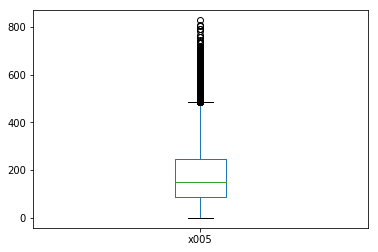

In [20]:
df['x005'].plot(kind = 'box')

In [21]:
def fill_na(col):
    df[col] = df[col].fillna(df[col].median())

In [22]:
fill_na('x005')


In [23]:
df.isna().sum()


x005      0
x014      0
x018      0
x019      0
x020      0
x022      0
x023      0
x025      0
x027      0
x028      0
x030      0
x046      0
x059      0
x064      0
x065      0
x224      0
x225      0
x226      0
x227      0
x228      0
x229      0
x236      0
x244      0
x245      0
x246      0
x247      0
x249      0
x250      0
x260      0
x261      0
x262      0
Source    0
y         0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Data columns (total 33 columns):
x005      100000 non-null float64
x014      100000 non-null int64
x018      100000 non-null int64
x019      100000 non-null int64
x020      100000 non-null int64
x022      100000 non-null int64
x023      100000 non-null int64
x025      100000 non-null int64
x027      100000 non-null int64
x028      100000 non-null int64
x030      100000 non-null int64
x046      100000 non-null int64
x059      100000 non-null int64
x064      100000 non-null int64
x065      100000 non-null int64
x224      100000 non-null int64
x225      100000 non-null int64
x226      100000 non-null int64
x227      100000 non-null int64
x228      100000 non-null int64
x229      100000 non-null int64
x236      100000 non-null int64
x244      100000 non-null int64
x245      100000 non-null int64
x246      100000 non-null int64
x247      100000 non-null int64
x249      100000 non-null int64
x250      100000 non-nul

In [25]:
train_df = df[df["Source"] == 'Train']
test_df = df[df["Source"] == 'Test']

In [26]:
train_df.drop(columns = ["Source"],inplace = True)
test_df.drop(columns = ["Source"],inplace = True)

In [27]:
train_X = train_df.drop(columns = ['y'])
train_Y = train_df['y']
test_X = test_df.drop(columns = ['y'])
test_Y = test_df['y']

In [28]:
train_X.shape

(80000, 31)

In [29]:
test_X.shape

(20000, 31)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_X)
test_scaled = scaler.transform(test_X)

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [32]:
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge()
model4 = ElasticNet()
model5 = DecisionTreeRegressor()
model6 = KNeighborsRegressor()
model7 = RandomForestRegressor()
model8 = AdaBoostRegressor()
model9 = GradientBoostingRegressor()
model10 = XGBRegressor()

In [33]:
model1.fit(train_X,train_Y)
model2.fit(train_X,train_Y)
model3.fit(train_X,train_Y)
model4.fit(train_X,train_Y)
model5.fit(train_X,train_Y)
model6.fit(train_X,train_Y)
model7.fit(train_X,train_Y)
model8.fit(train_X,train_Y)
model9.fit(train_X,train_Y)
model10.fit(train_X,train_Y)

[22:52:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [34]:
y_train_model1_predmodel1= model1.predict(train_X)
y_train_model2_predmodel2= model2.predict(train_X)
y_train_model3_predmodel3= model3.predict(train_X)
y_train_model4_predmodel4= model4.predict(train_X)
y_train_model5_predmodel5= model5.predict(train_X)
y_train_model6_predmodel6= model6.predict(train_X)
y_train_model7_predmodel7= model7.predict(train_X)
y_train_model8_predmodel8= model8.predict(train_X)
y_train_model9_predmodel9= model9.predict(train_X)
y_train_model10_predmodel10= model10.predict(train_X)

In [35]:
y_test_model1_predmodel1= model1.predict(test_X)
y_test_model2_predmodel2= model2.predict(test_X)
y_test_model3_predmodel3= model3.predict(test_X)
y_test_model4_predmodel4= model4.predict(test_X)
y_test_model5_predmodel5= model5.predict(test_X)
y_test_model6_predmodel6= model6.predict(test_X)
y_test_model7_predmodel7= model7.predict(test_X)
y_test_model8_predmodel8= model8.predict(test_X)
y_test_model9_predmodel9= model9.predict(test_X)
y_test_model10_predmodel10= model10.predict(test_X)

In [36]:
from sklearn.metrics import mean_squared_error
def RMSE(y_true, y_pred): 

    return np.sqrt(mean_squared_error(y_true, y_pred))

In [37]:
print('Linear Regression train prediction: {}'.format(RMSE(train_Y,y_train_model1_predmodel1)))
print('Lasso train prediction: {}'.format(RMSE(train_Y,y_train_model2_predmodel2)))
print('Ridge train prediction: {}'.format(RMSE(train_Y,y_train_model3_predmodel3)))
print('Elastic Net Regression train prediction: {}'.format(RMSE(train_Y,y_train_model4_predmodel4)))
print('Decision Tree Regression train prediction: {}'.format(RMSE(train_Y,y_train_model5_predmodel5)))
print('KNN Regression train prediction: {}'.format(RMSE(train_Y,y_train_model6_predmodel6)))
print('Random Forest Regression train prediction: {}'.format(RMSE(train_Y,y_train_model7_predmodel7)))
print('Adaboost Regression train prediction: {}'.format(RMSE(train_Y,y_train_model8_predmodel8)))
print('GradientBoost Regression train prediction: {}'.format(RMSE(train_Y,y_train_model9_predmodel9)))
print('XGB Regression train prediction: {}'.format(RMSE(train_Y,y_train_model10_predmodel10)))

Linear Regression train prediction: 73.62874924647588
Lasso train prediction: 74.13202569453648
Ridge train prediction: 73.62874950782039
Elastic Net Regression train prediction: 76.5652552240765
Decision Tree Regression train prediction: 8.798602040489499
KNN Regression train prediction: 55.52658615474213
Random Forest Regression train prediction: 24.2406311555647
Adaboost Regression train prediction: 70.20111565898738
GradientBoost Regression train prediction: 53.80320133060173
XGB Regression train prediction: 53.84010778593324


In [38]:
print('Linear Regression test prediction: {}'.format(RMSE(test_Y,y_test_model1_predmodel1)))
print('Lasso test prediction: {}'.format(RMSE(test_Y,y_test_model2_predmodel2)))
print('Ridge test prediction: {}'.format(RMSE(test_Y,y_test_model3_predmodel3)))
print('Elastic Net Regression test prediction: {}'.format(RMSE(test_Y,y_test_model4_predmodel4)))
print('Decision Tree Regression test prediction: {}'.format(RMSE(test_Y,y_test_model5_predmodel5)))
print('KNN Regression test prediction: {}'.format(RMSE(test_Y,y_test_model6_predmodel6)))
print('Random Forest Regression test prediction: {}'.format(RMSE(test_Y,y_test_model7_predmodel7)))
print('Adaboost Regression test prediction: {}'.format(RMSE(test_Y,y_test_model8_predmodel8)))
print('GradientBoost Regression test prediction: {}'.format(RMSE(test_Y,y_test_model9_predmodel9)))
print('XGB Regression test prediction: {}'.format(RMSE(test_Y,y_test_model10_predmodel10)))

Linear Regression test prediction: 73.39351245151973
Lasso test prediction: 73.87422277735807
Ridge test prediction: 73.39347184517403
Elastic Net Regression test prediction: 76.3840438685576
Decision Tree Regression test prediction: 73.18094062557101
KNN Regression test prediction: 68.03072000206964
Random Forest Regression test prediction: 54.85392152642417
Adaboost Regression test prediction: 69.91190364050178
GradientBoost Regression test prediction: 53.867432883448
XGB Regression test prediction: 53.93132569657885


In [39]:
from sklearn.metrics import mean_absolute_error
def MAE(y_true, y_pred): 

    return np.sqrt(mean_absolute_error(y_true, y_pred))

In [40]:
print('Linear Regression train prediction: {}'.format(MAE(train_Y,y_train_model1_predmodel1)))
print('Lasso train prediction: {}'.format(MAE(train_Y,y_train_model2_predmodel2)))
print('Ridge train prediction: {}'.format(MAE(train_Y,y_train_model3_predmodel3)))
print('Elastic Net Regression train prediction: {}'.format(MAE(train_Y,y_train_model4_predmodel4)))
print('Decision Tree Regression train prediction: {}'.format(MAE(train_Y,y_train_model5_predmodel5)))
print('KNN Regression train prediction: {}'.format(MAE(train_Y,y_train_model6_predmodel6)))
print('Random Forest Regression train prediction: {}'.format(MAE(train_Y,y_train_model7_predmodel7)))
print('Adaboost Regression train prediction: {}'.format(MAE(train_Y,y_train_model8_predmodel8)))
print('GradientBoost Regression train prediction: {}'.format(MAE(train_Y,y_train_model9_predmodel9)))
print('XGB Regression train prediction: {}'.format(MAE(train_Y,y_train_model10_predmodel10)))

Linear Regression train prediction: 7.563601786144412
Lasso train prediction: 7.607537620599846
Ridge train prediction: 7.563612992313606
Elastic Net Regression train prediction: 7.77094774702744
Decision Tree Regression train prediction: 1.26349210498955
KNN Regression train prediction: 6.462988859653095
Random Forest Regression train prediction: 4.064705896973796
Adaboost Regression train prediction: 7.491397073090311
GradientBoost Regression train prediction: 6.331528892807412
XGB Regression train prediction: 6.33662350954787


In [41]:
print('Linear Regression test prediction: {}'.format(MAE(test_Y,y_test_model1_predmodel1)))
print('Lasso test prediction: {}'.format(MAE(test_Y,y_test_model2_predmodel2)))
print('Ridge test prediction: {}'.format(MAE(test_Y,y_test_model3_predmodel3)))
print('Elastic Net Regression test prediction: {}'.format(MAE(test_Y,y_test_model4_predmodel4)))
print('Decision Tree Regression test prediction: {}'.format(MAE(test_Y,y_test_model5_predmodel5)))
print('KNN Regression test prediction: {}'.format(MAE(test_Y,y_test_model6_predmodel6)))
print('Random Forest Regression test prediction: {}'.format(MAE(test_Y,y_test_model7_predmodel7)))
print('Adaboost Regression test prediction: {}'.format(MAE(test_Y,y_test_model8_predmodel8)))
print('GradientBoost Regression test prediction: {}'.format(MAE(test_Y,y_test_model9_predmodel9)))
print('XGB Regression test prediction: {}'.format(MAE(test_Y,y_test_model10_predmodel10)))

Linear Regression test prediction: 7.563958570039225
Lasso test prediction: 7.603737234339417
Ridge test prediction: 7.563965747503053
Elastic Net Regression test prediction: 7.767952094095912
Decision Tree Regression test prediction: 7.212238640787456
KNN Regression test prediction: 7.162834634416741
Random Forest Regression test prediction: 6.3085080884824105
Adaboost Regression test prediction: 7.471502517109121
GradientBoost Regression test prediction: 6.330713037305921
XGB Regression test prediction: 6.3389587127260505
